In [103]:
import numpy as np
import pandas as pd
from plotnine import *
import statsmodels.api as sm


# Introduction to Linear Models 📈

## Overview 

Like all models, linear models are simplifications of complex real-world processes. 

These are algorithms that attempt to learn the mean and variance of some measurement using an additive linear combination of other measurements. That is, by creating a line/plane/hyperplane.

These models are the foundation of modern statistics and are _unreasonably successful_ at describing associations and predicting outcomes, despite almost always being mechanistically wrong. Linear models provide immensely useful approximations of associations, but don't believe it provides an accurate mechanistic model.  



In [18]:
# load & filter dataset

df = pd.read_csv('../DATASETS/pokemon.csv')
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [31]:
poke = df.filter(['attack', 'defense']).dropna(axis=0, how='any')
poke

,attack,defense
0,49,49
1,62,63
2,100,123
3,52,43
4,64,58
...,...,...
796,101,103
797,181,131
798,101,53
799,107,101


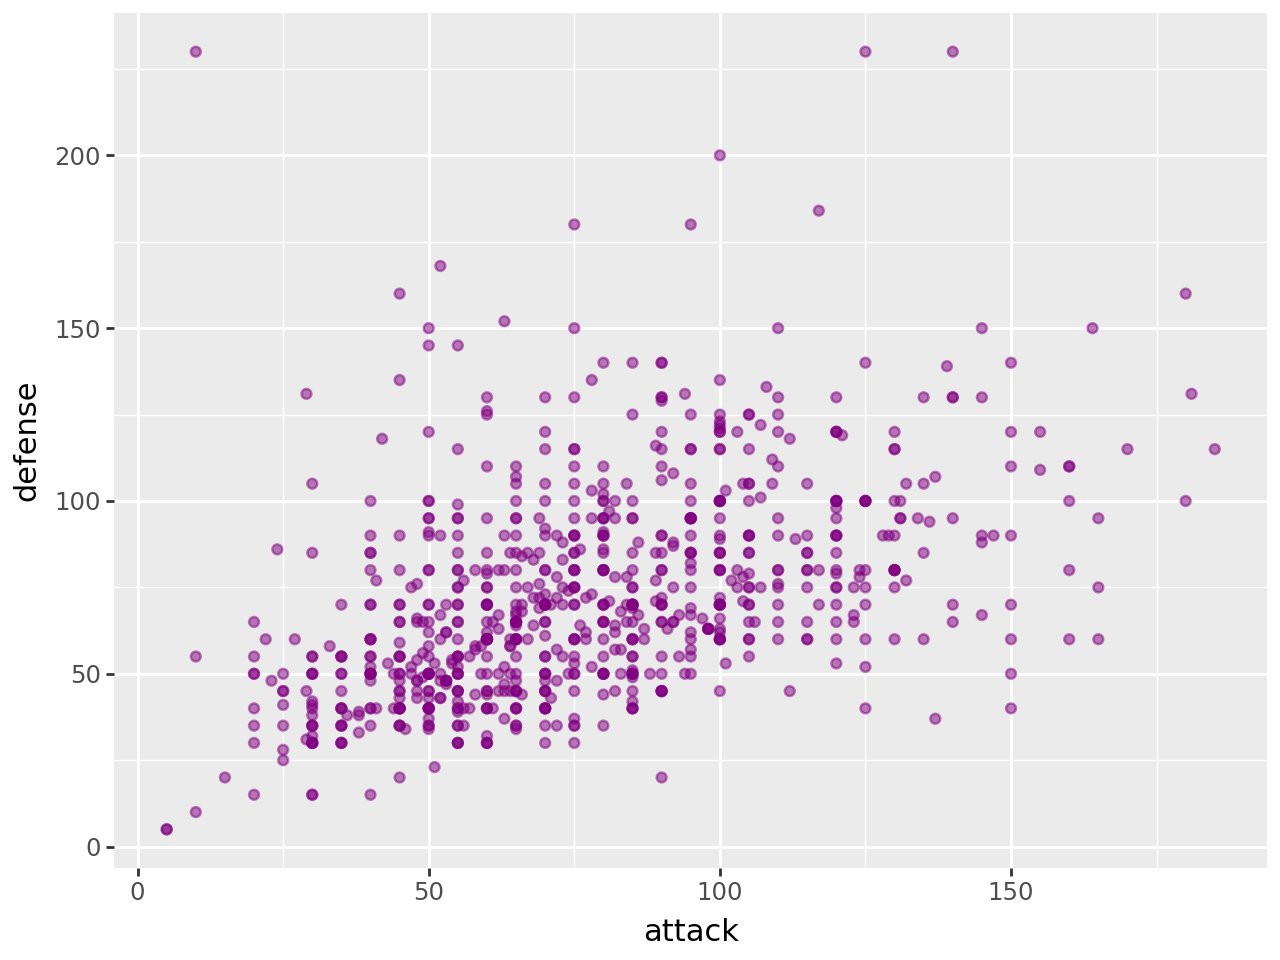

In [32]:
# plot relationship between speed and attack

(
    ggplot(poke, aes(x='attack', y='defense'))
    + geom_point(color='purple', alpha=0.5)
)

# OLS Regression

Ordinary Least Squares regression fits a linear model to minimize the residual sum of squares between the observed targets in the dataset and targets predicted by the linear approximation. We want to estimate how the average target changes with the predictor(s).

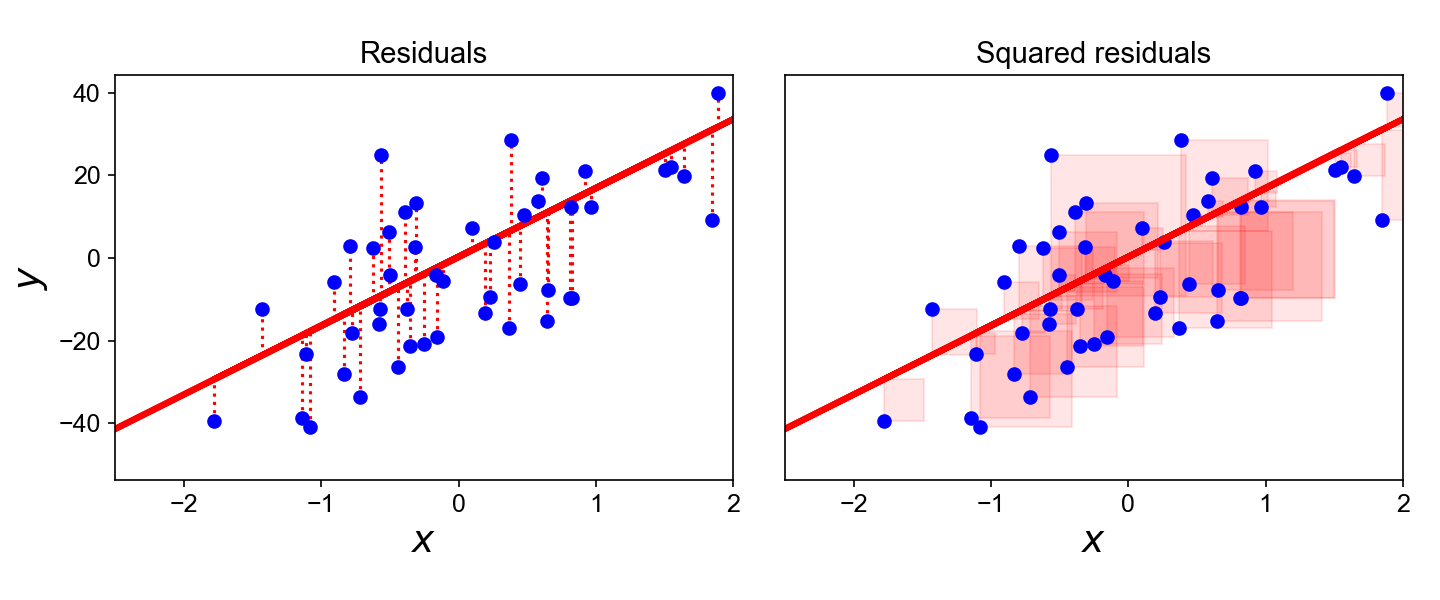

Assumptions:
* L: Linear relationship
* I: Independent data
* N: Normally distributed errors
* E: Equal variance

Pros:
 * Easy to fit.
 * Easy to understand.
 * Easy to explain.
 * Unreasonably effective.

Cons:
 * Multicolinearity
 * High bias
 * Susceptible to outliers & high leverage points
 
 

In [348]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

In [34]:
# fit ols model to pokemon data

#initialize ols model

ols_model = LinearRegression()

In [35]:
# create X and y

X = poke[['attack']]
y = poke[['defense']]

In [36]:
ols_model.fit(X, y)

LinearRegression()

In [37]:
# coefficient for attack parameter
ols_model.coef_

array([[0.44865196]])

This suggests that every 1pt increase in attack 🐲 is associated with an average .45pt increase in defense. 🐢 Doesn't really seem fair!

In [40]:
# we can get the intercept of the line too
# intercept is often meaningless in linear regression, could center the data to make more meaningful
ols_model.intercept_

array([38.07773922])

so our model is:  defense = 38.08 + 0.45 * attack

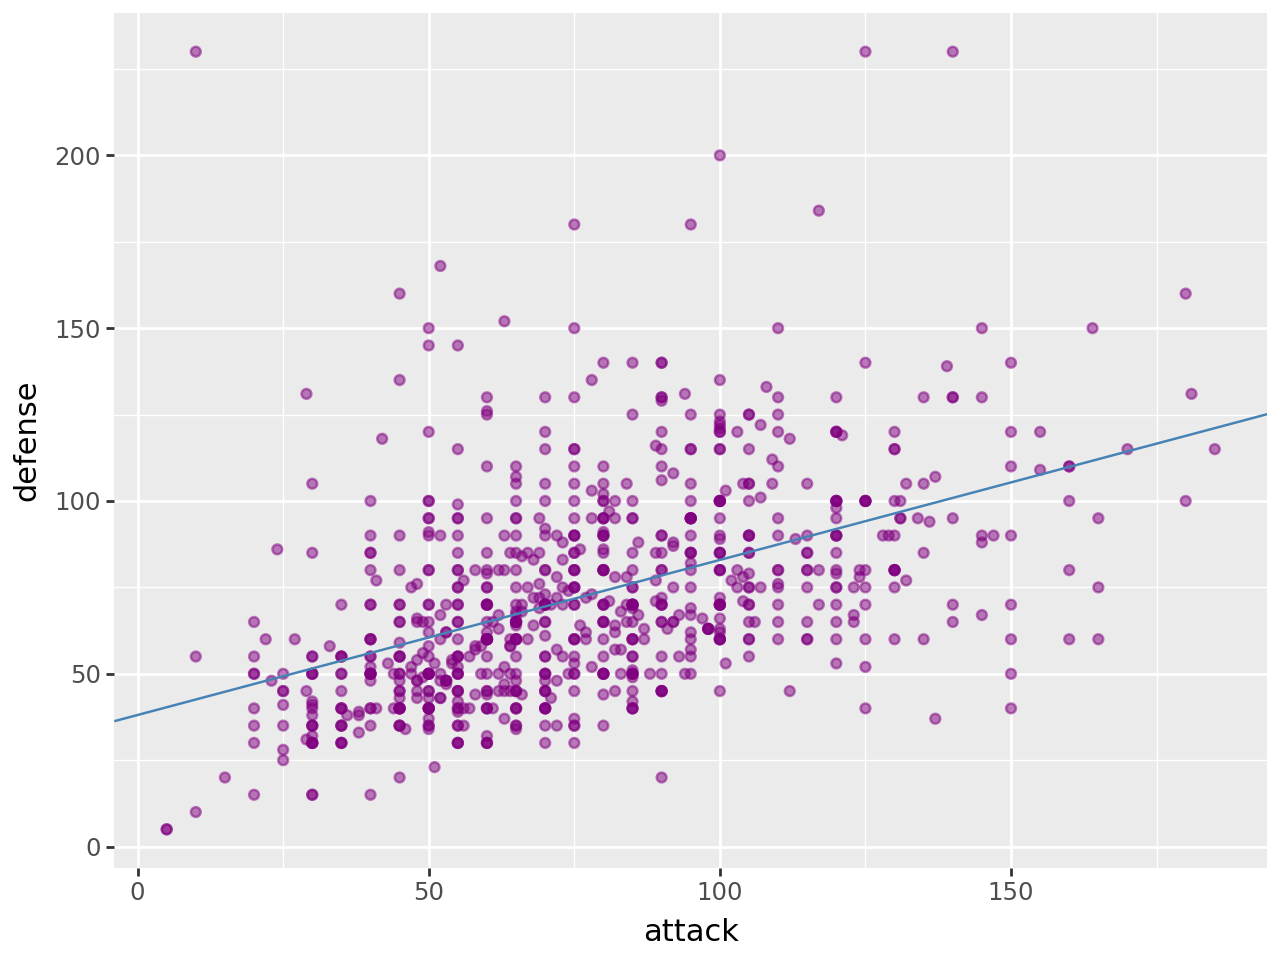

In [69]:
(
    ggplot(poke, aes('attack', 'defense'))
    + geom_point(color='purple', alpha=0.5)
    + geom_abline(slope=ols_model.coef_[0][0], intercept=ols_model.intercept_[0], color='steelblue')
    #+ geom_smooth(method='lm', color='grey', se=False, size = 2, linetype='dashed')
)

so let's predict the defense of a new pokemon that I just created :: Datapus 🐙 :: based on an attack power of 100!! 

In [77]:
ols_model.predict(np.array([100]).reshape(-1, 1))

c:\Users\JayLynch\OneDrive - MCO\BL\bl-gitlab-projects\data-science-always-learning\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


array([[82.9429353]])

c:\Users\JayLynch\OneDrive - MCO\BL\bl-gitlab-projects\data-science-always-learning\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


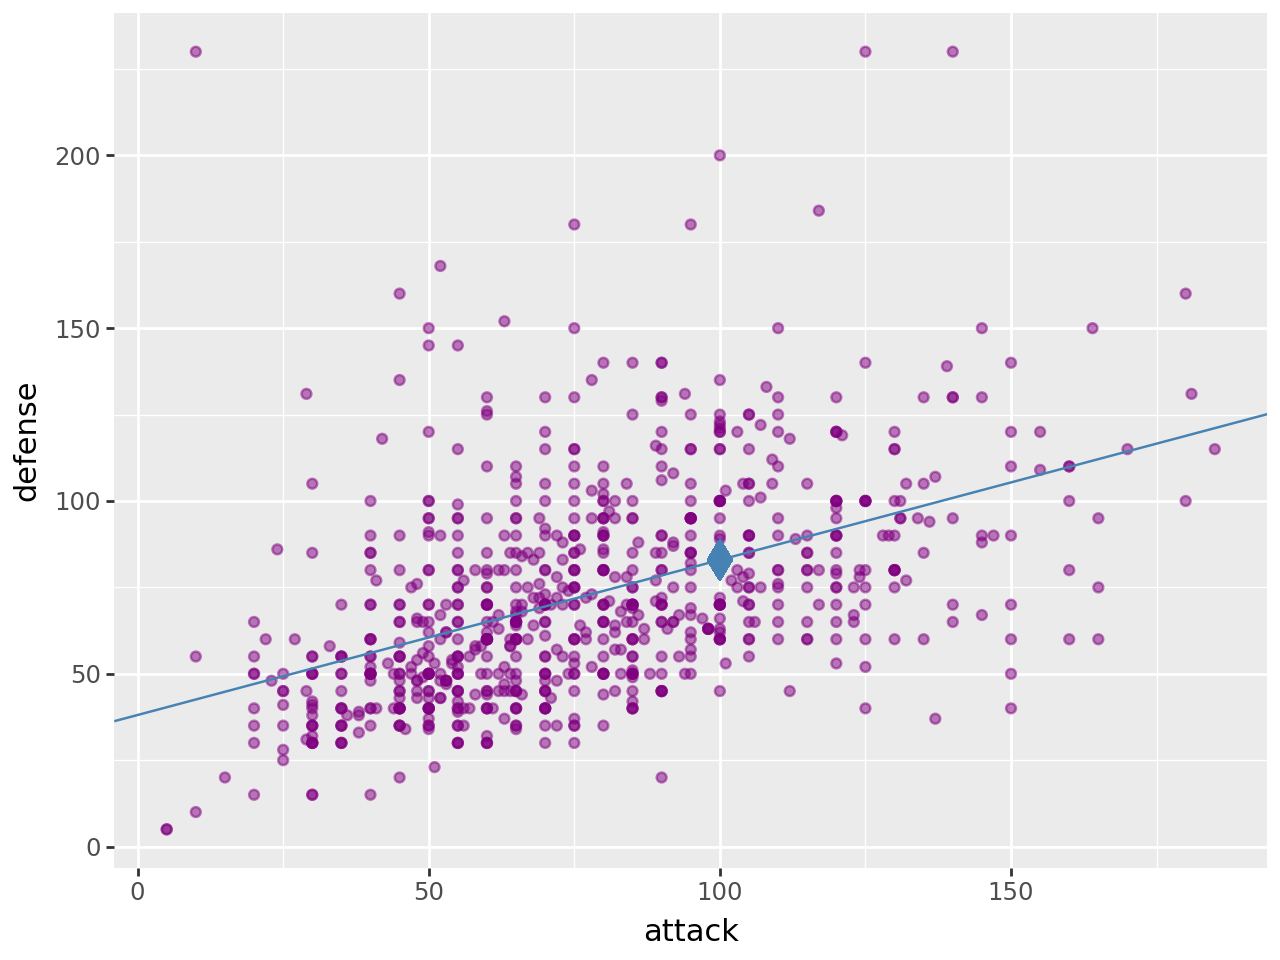

In [101]:
(
    ggplot(poke, aes('attack', 'defense'))
    + geom_point(color='purple', alpha=0.5)
    + geom_abline(slope=ols_model.coef_[0][0], intercept=ols_model.intercept_[0], color='steelblue')
    #+ geom_smooth(method='lm', color='grey', se=False, size = 2, linetype='dashed')
    + geom_point(x=100, y=ols_model.predict(np.array([100]).reshape(-1, 1))[0][0], color='steelblue', size=5, alpha=0.9, shape = 'd')
)

## A diversion: into error and uncertainty 🤓

A common concern with this approach is to focus too much on the point estimate of our model, while failing to appreciate that both the model (because it was trained on only a sample of the population) and the estimate itself (in terms of standard error) come with uncertainty that should be communicated. To really understand and appreciate the informativeness of our model we should incorporate these. Unfortunately, sklearn is primarily for training ML models and predictions... so if we want to dive into inference statsmodels is a valuable alternative.  

In [107]:
X = sm.add_constant(X) # adds a constant to predictor

sm_model = sm.OLS(y, X).fit()

sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                defense   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     225.2
Date:                Thu, 01 Aug 2024   Prob (F-statistic):           4.96e-45
Time:                        17:25:55   Log-Likelihood:                -3781.3
No. Observations:                 801   AIC:                             7567.
Df Residuals:                     799   BIC:                             7576.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.0777      2.518     15.121      0.000      33.135      43.021
attack         0.4487      0.030     15.007      0.000       0.390       0.507
==============================================================================
Omnibus:                      275.085   Durbin-Watson:                   1.589
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1191.938
Skew:                           1.543   Prob(JB):                    1.49e-259
Kurtosis:                       8.118   Cond. No.                         221.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This output is pretty cool:

* The standard errors displayed represent estimation uncertainty. We can _roughly_ say that coefficient estimates within 2 std err of coefficient are consistent with the data. Thus the data are roughly consistent with values of β in the range [.45 ± .03] = [.42, .48]
*  The Adj R2 provides the fraction of variance "explained" or accounted for by the model (22%)

In [112]:
# we can also directly calculate confidence intervals (taking into account sample size and using t-distribution)
sm_model.conf_int(alpha=0.05)

,0,1
const,33.134672,43.020806
attack,0.389967,0.507337


One thing not shown, is how far off we are on average in our predictions-- let's figure this out.

In [159]:
# Predicted values
predictions = sm_model.predict(X)

# Calculate RMSE
rmse = np.sqrt(np.mean((predictions - poke['defense'])**2))
rmse

27.159685765144747

We can add even more uncertainty by finting a linear model to different subsets of the data and capturing the estimates, then calculating percentiles to capture 95% range

In [113]:
from sklearn.utils import resample

n_iterations = 1000
coefs = []

for _ in range(n_iterations):
    # Resample the data
    sample_data = resample(poke)
    sample_X = sm.add_constant(sample_data['attack'])
    sample_y = sample_data['defense']
    
    # Fit the model on the resampled data
    sample_model = sm.OLS(sample_y, sample_X).fit()
    coefs.append(sample_model.params[1])  # Capture the coefficient for the 'defense' variable

# Calculate the bootstrap confidence interval
bootstrapped_conf_interval = np.percentile(coefs, [2.5, 97.5])

C:\Users\JayLynch\AppData\Local\Temp\ipykernel_15564\1944691451.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
C:\Users\JayLynch\AppData\Local\Temp\ipykernel_15564\1944691451.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
C:\Users\JayLynch\AppData\Local\Temp\ipykernel_15564\1944691451.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
C:\Users\JayLynch\AppData\Local\Temp\ipykernel_15564\1944691451.py:14: FutureWarning: Serie

In [114]:
bootstrapped_conf_interval

array([0.37936836, 0.5146047 ])

these estimates are even a little wider, reflecting the fluctuations in different samples of our dataset

In [150]:
n_iterations = 1000
bootstrap_models = []

for _ in range(n_iterations):
    # Resample the data
    sample_data = resample(poke)
    sample_X = sm.add_constant(sample_data['attack'])
    sample_y = sample_data['defense']
    
    # Fit the model on the resampled data
    sample_model = sm.OLS(sample_y, sample_X).fit()
    bootstrap_models.append(sample_model.params)

# Convert to DataFrame for plotting
bootstrap_coefs = pd.DataFrame(bootstrap_models)




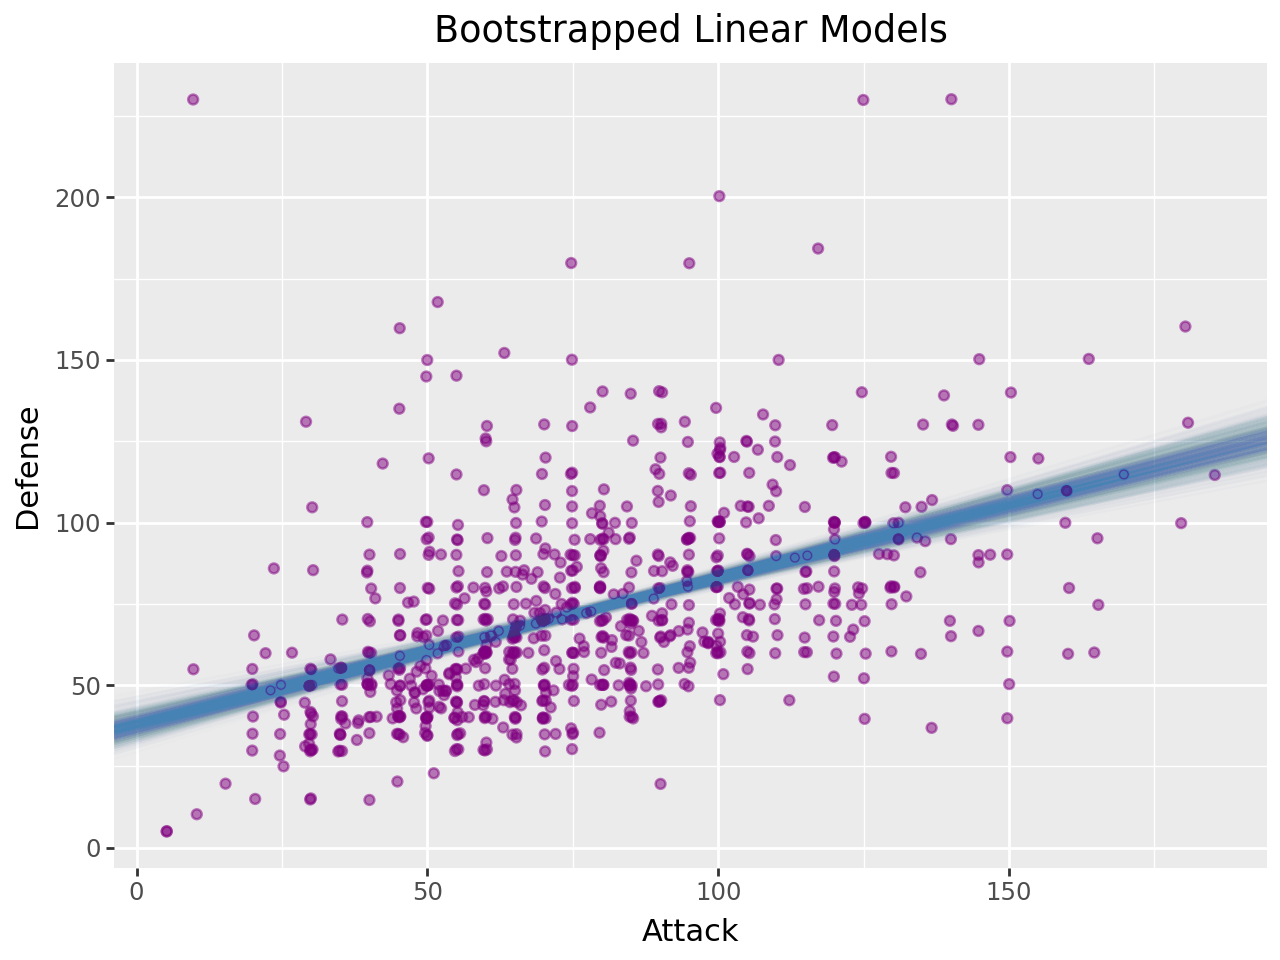

In [155]:
base_plot = (
    ggplot(poke, aes(x='attack', y='defense')) +
    geom_point(position='jitter', alpha=0.5, color='purple') +  # Scatter plot with jitter
    labs(title='Bootstrapped Linear Models',
        x='Attack',
        y='Defense')
)

# Add bootstrapped linear models
for index, row in bootstrap_coefs.iterrows():
    base_plot += geom_abline(intercept=row['const'], slope=row['attack'], alpha=0.01, color='steelblue')

base_plot

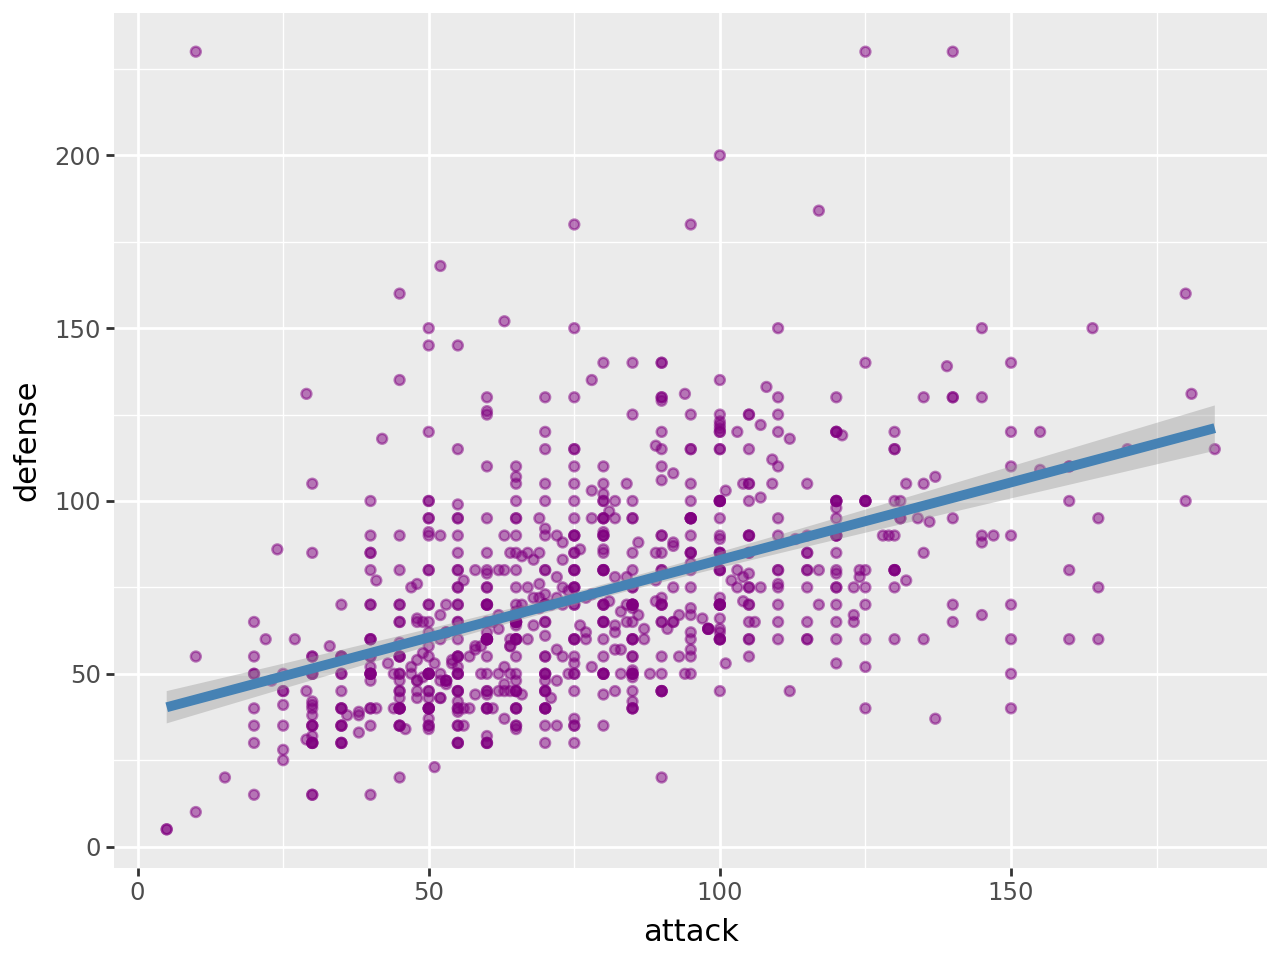

In [154]:
(
    ggplot(poke, aes('attack', 'defense'))
    + geom_point(color='purple', alpha=0.5)
    + geom_smooth(method='lm', color='steelblue', se=True, size = 2)
)

## Back to the story...

* Let's combine our knowledge of transformations now to train some more complex models, with categorical features and polynomial features.
* Let's also do some good ML practice and actually create train/test sets to evaluate our model's predictions on unseen data! Social scientists be jealous-- but conflate exploratory and predictive models. Let's be transparent about the validation process and report the results from train/test splits or cross-validation and include performance metrics that reflect the model’s ability to generalize to new data (e.g., RMSE, MAE).

In [237]:
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score

In [165]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [322]:
poke2 = df.query("type1.str.contains('water|electric|normal')").filter(['type1', 'attack', 'defense'])

In [327]:
one_hot = OneHotEncoder(drop='first')
poly = PolynomialFeatures(2)

In [312]:
NUM_COLS = ['attack']
CAT_COLS = ['type1']

In [328]:

cat_column_transformer = make_column_transformer(
        
        (one_hot, CAT_COLS),
        remainder='passthrough',
        verbose_feature_names_out=False
)

In [282]:
one_hot_df = cat_column_transformer.fit_transform(poke2)

In [283]:
# Create DataFrame from encoded data with column names
encoded_df = pd.DataFrame(cat_column_transformer.transform(poke2), columns=cat_column_transformer.get_feature_names_out())

In [284]:
encoded_df

,type1_grass,type1_normal,type1_water,attack,defense
0,1.0,0.0,0.0,49.0,49.0
1,1.0,0.0,0.0,62.0,63.0
2,1.0,0.0,0.0,100.0,123.0
3,0.0,0.0,1.0,48.0,65.0
4,0.0,0.0,1.0,63.0,80.0
...,...,...,...,...,...
292,0.0,0.0,1.0,105.0,70.0
293,0.0,1.0,0.0,60.0,85.0
294,1.0,0.0,0.0,130.0,115.0
295,0.0,0.0,1.0,75.0,115.0


In [285]:
num_column_transformer = make_column_transformer(
        
        (poly, NUM_COLS),
        remainder='passthrough',
        verbose_feature_names_out=False
)

In [286]:
poly_df = num_column_transformer.fit_transform(encoded_df)

In [287]:
# Create DataFrame from encoded data with column names
encoded_df = pd.DataFrame(num_column_transformer.transform(encoded_df), columns=num_column_transformer.get_feature_names_out())

In [288]:
encoded_df

,1,attack,attack^2,type1_grass,type1_normal,type1_water,defense
0,1.0,49.0,2401.0,1.0,0.0,0.0,49.0
1,1.0,62.0,3844.0,1.0,0.0,0.0,63.0
2,1.0,100.0,10000.0,1.0,0.0,0.0,123.0
3,1.0,48.0,2304.0,0.0,0.0,1.0,65.0
4,1.0,63.0,3969.0,0.0,0.0,1.0,80.0
...,...,...,...,...,...,...,...
292,1.0,105.0,11025.0,0.0,0.0,1.0,70.0
293,1.0,60.0,3600.0,0.0,1.0,0.0,85.0
294,1.0,130.0,16900.0,1.0,0.0,0.0,115.0
295,1.0,75.0,5625.0,0.0,0.0,1.0,115.0


In [289]:
X = encoded_df.drop('defense', axis=1)
y = encoded_df['defense']

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

Let's build the model

In [291]:
model2 = LinearRegression()

In [292]:
model2.fit(X_train, y_train)

LinearRegression()

In [293]:
model2.coef_

array([ 0.00000000e+00,  8.25647847e-01, -1.77852167e-03,  3.34950006e+00,
       -8.74468371e+00,  5.39518365e+00])

In [294]:
sm_model2 = sm.OLS(y_train, X_train).fit()

In [295]:
sm_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                defense   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     47.88
Date:                Fri, 02 Aug 2024   Prob (F-statistic):           3.41e-30
Time:                        11:14:22   Log-Likelihood:                -1185.3
No. Observations:                 267   AIC:                             2381.
Df Residuals:                     262   BIC:                             2399.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
1               13.5482      4.725      2.867      0.004       4.244      22.852
attack           0.8256      0.159      5.194      0.000       0.513       1.139
attack^2        -0.0018      0.001     -1.892      0.060      -0.004    7.22e-05
type1_grass      7.8656      2.536      3.101      0.002       2.871      12.860
type1_normal    -4.2286      2.357     -1.794      0.074      -8.870       0.413
type1_water      9.9113      2.326      4.262      0.000       5.332      14.491
==============================================================================
Omnibus:                       72.918   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.007
Skew:                           1.154   Prob(JB):                     5.65e-52
Kurtosis:                       6.985   Cond. No.                     1.77e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.63e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [354]:
one_hot_df = cat_column_transformer.fit_transform(poke2)
# Create DataFrame from encoded data with column names
encoded_df = pd.DataFrame(cat_column_transformer.transform(poke2), columns=cat_column_transformer.get_feature_names_out())
X = encoded_df.drop('defense', axis=1)
y = encoded_df['defense']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_train = sm.add_constant(X_train) # adds a constant to predictor
X_test = sm.add_constant(X_test) # adds a constant to predictor
sm_model3 = sm.OLS(y_train, X_train).fit()
sm_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                defense   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     49.42
Date:                Fri, 02 Aug 2024   Prob (F-statistic):           5.37e-24
Time:                        11:44:45   Log-Likelihood:                -895.71
No. Observations:                 206   AIC:                             1799.
Df Residuals:                     202   BIC:                             1813.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           26.5244      4.774      5.556      0.000      17.112      35.937
type1_normal    -5.2302      3.901     -1.341      0.181     -12.922       2.461
type1_water      8.8581      3.914      2.263      0.025       1.140      16.576
attack           0.5001      0.046     10.962      0.000       0.410       0.590
==============================================================================
Omnibus:                       25.327   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.583
Skew:                           0.689   Prob(JB):                     1.54e-09
Kurtosis:                       4.682   Cond. No.                         391.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

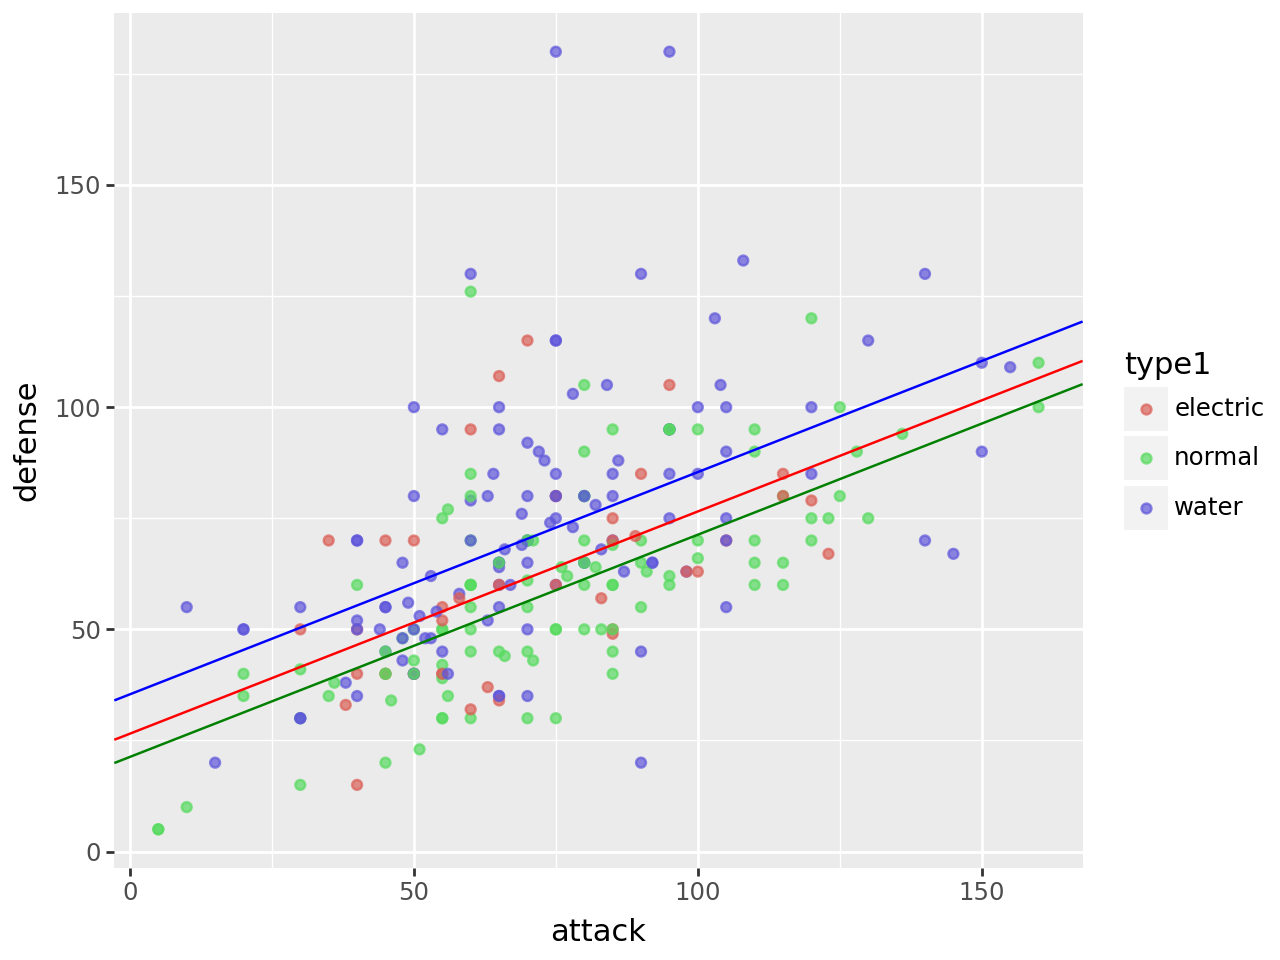

In [343]:
(
    ggplot(poke2, aes('attack', 'defense', color='type1'))
    + geom_point(alpha=0.7)
    + geom_abline(slope=sm_model3.params.iloc[3], intercept=sm_model3.params.iloc[0], color='red') # electric
    + geom_abline(slope=sm_model3.params.iloc[3], intercept=sm_model3.params.iloc[0] + sm_model3.params.iloc[1], color='green') # normal
    + geom_abline(slope=sm_model3.params.iloc[3], intercept=sm_model3.params.iloc[0] + sm_model3.params.iloc[2], color='blue') # water
)

In [347]:
np.sqrt(sm_model3.mse_resid) # sm_model3.mse_resid


18.8960729532708

OK, let's actually predict unseen data rather than just rely on p values and exploratory analyses to understand relationships

In [344]:
model3 = LinearRegression()
model3.fit(X_train, y_train)
model3.coef_

array([ 0.        , -5.23015033,  8.85806762,  0.50009227])

In [350]:
# Define the MSE scorer
mse_scorer = make_scorer(mean_squared_error)

np.sqrt(cross_val_score(model3, X_train, y_train, cv=5, scoring=mse_scorer).mean())

19.016822529795515

In [356]:
# Make predictions on the testing set
y_pred = model3.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

27.23721102740396

So this suggests, not surprisingly, that using this model to predict unseen data are likely to be overconfident if we just report the model outputs.

# The Power of Regularization

Imagine a smart and eager student who has been asked to find the best model to predict data that has been provided. The student gets extremely excited by the data they see and does their best to build a model that most closely captures the all the intricate patterns in the data so as to recreate it with greatest fidelity. After turning this into the professor, the professor now says, "Great but I am going to use this model to predict the outputs of data you haven't actually been provided to evaluate you." Surely this wouldn't be fair. In fact, the student is likely to panic, because they've built their model not too predict an unknown future, but to most closely capture the details they were provided-- including whatever noise and idiosyncrasies and unusual features were present. This means it is likely to be less successful when generalizing to unseen data than if the student had built a model that ignored extremely small or large or unusual features. 

Similarly, it isn't fair to ask our models to generate estimates knowing that they are going to be overly excited to capture whatever features in data they see-- unknowing that they will be evaluated on data they haven't seen. So we need to help them not get so excited-- we need to share some of our wisdom-- by incorporating optimization penalties that nudge the models to avoid estimates reflecting unusual values. This is what Ridge, Lasso, and Elastic-Net models do. 